In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.pdfigcapx.utils import extract_page_text_content
from selenium import webdriver
from pathlib import Path

html_sample_1 = str(Path('../tests/data/htmls/page1.html').resolve())
html_sample_2 = str(Path('../tests/data/htmls/page2.html').resolve())
png_sample_1 = str(Path('../tests/data/htmls/page1.png').resolve())

In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [4]:
page1 = extract_page_text_content(driver, html_sample_1)
page2 = extract_page_text_content(driver, html_sample_2)

In [5]:
pages = [page1, page2]
MIN_LENGTH = 30

x_top_left_points = []
for page in pages:
  for text_box in page.text_boxes:
    if len(text_box.text) > MIN_LENGTH:
      x_top_left_points.append(text_box.x_top_left)

x_top_left_points = sorted([(x_pos, x_top_left_points.count(x_pos))
                                  for x_pos in set(x_top_left_points)],
                                 key=lambda x: x[1],
                                 reverse=True)

In [6]:
x_top_left_points

[(167, 71), (36, 14), (166, 14), (35, 5), (188, 4), (421, 1), (180, 1)]

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image

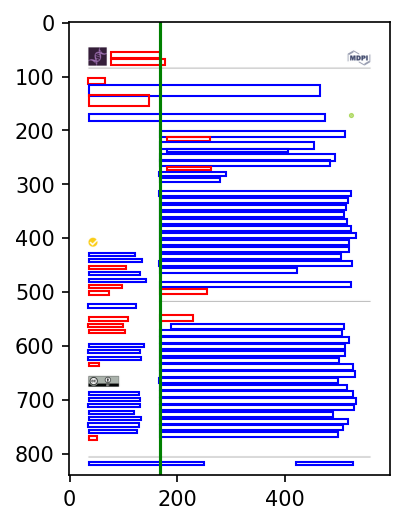

In [31]:
img = Image.open(png_sample_1)
img = img.resize((page1.width, page1.height), Image.ANTIALIAS)

fig, ax = plt.subplots(dpi=150)

x_top_left_points = []
row_widths = []
row_heights = []
y_tops = []

for text_box in page1.text_boxes:
  
  if len(text_box.text) > MIN_LENGTH:
    x_top_left_points.append(text_box.x_top_left)
    row_heights.append(text_box.height)
    row_widths.append(text_box.width)
    y_tops.append(text_box.y_top_left)
    edgecolor = 'b'
  else: 
    edgecolor = 'r'
  rect = patches.Rectangle((text_box.x_top_left, text_box.y_top_left), text_box.width, text_box.height, linewidth=1, edgecolor=edgecolor, facecolor='none')
  ax.add_patch(rect)

x_top_left_points = sorted([(x_pos, x_top_left_points.count(x_pos))
                                  for x_pos in set(x_top_left_points)],
                                 key=lambda x: x[1],
                                 reverse=True)
row_widths = sorted([(i, row_widths.count(i))
                             for i in set(row_widths)],
                            key=lambda x: x[1],
                            reverse=True)
row_heights = sorted([(i, row_heights.count(i))
                      for i in set(row_heights)],
                      key=lambda x: x[1],
                      reverse=True)     

layout = (max(0, min(y_tops)), min(page1.height, max(y_tops)))
ax.plot([x_top_left_points[0][0], x_top_left_points[0][0]], [0, page1.height], color="g")
ax.imshow(img)

In [33]:
layout

(116, 815)